In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Original value of mu for class 1
mu = np.array([-1, 1])

# Graphic params
beta0_bnd = [-1.5, 1.5]
beta1_bnd = [-1.5, 1.5]
beta_step = 0.01
beta0, beta1 = np.meshgrid(np.arange(beta0_bnd[0], beta0_bnd[1], beta_step), np.arange(beta1_bnd[0], beta1_bnd[1], beta_step))

# Version With Linear in  Beta Effect

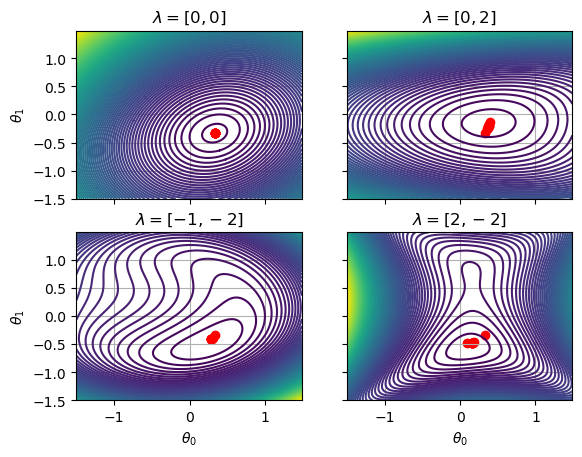

In [2]:
# Risk computation for linear in beta effect (**dirty**)
def risk(mu, lm, beta0, beta1):
  dp = np.multiply(mu[0]+lm[0]*beta0, beta0)+np.multiply(mu[1]+lm[1]*beta1, beta1)
  R = 0.5*(2 + 0.5*np.square(dp) + 2*dp + 2*(np.square(beta0)+np.square(beta1)))
  return R

# Plot
fig, axs = plt.subplots(2,2)
Lm = np.array([[0, 0], [0, 2], [-1, -2], [2, -2]])

for i in range(Lm.shape[0]):
  R = risk(mu, Lm[i,:], beta0, beta1)
  axs[i//2,i%2].contour(beta0, beta1, R, 100) #axs[0,0].plot_surface(beta0, beta1, R)
  axs[i//2, i%2].set_title(r'$\lambda = [{} , {}]$'.format(Lm[i, 0], Lm[i, 1]))
  #axs[i//2,i%2].set_xticks([-0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
  #axs[i//2,i%2].set_yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5])
  axs[i//2,i%2].grid()

  # Superpose to each figure the corresponding trajectory of retraining
  m = 10
  beta_retraining = np.zeros((m, 2))
  for j in range(m):
    if j == 0:
      v = mu # Initial estimate with no prior deployment
    else:
      v = mu + np.multiply(beta_retraining[j-1,:], Lm[i,:]) # Performative effect with previously estimated value
    beta_retraining[j,:] = -v/(2+0.5*np.sum(np.square(v)))
  axs[i//2,i%2].scatter(beta_retraining[:,0], beta_retraining[:,1], color='red', marker='o')

for ax in axs.flat:
    ax.set(xlabel='$\\theta_0$', ylabel='$\\theta_1$')  # LaTeX formatting added

for ax in axs.flat:
    ax.label_outer()

plt.savefig('linear-regression.pdf')
plt.show()


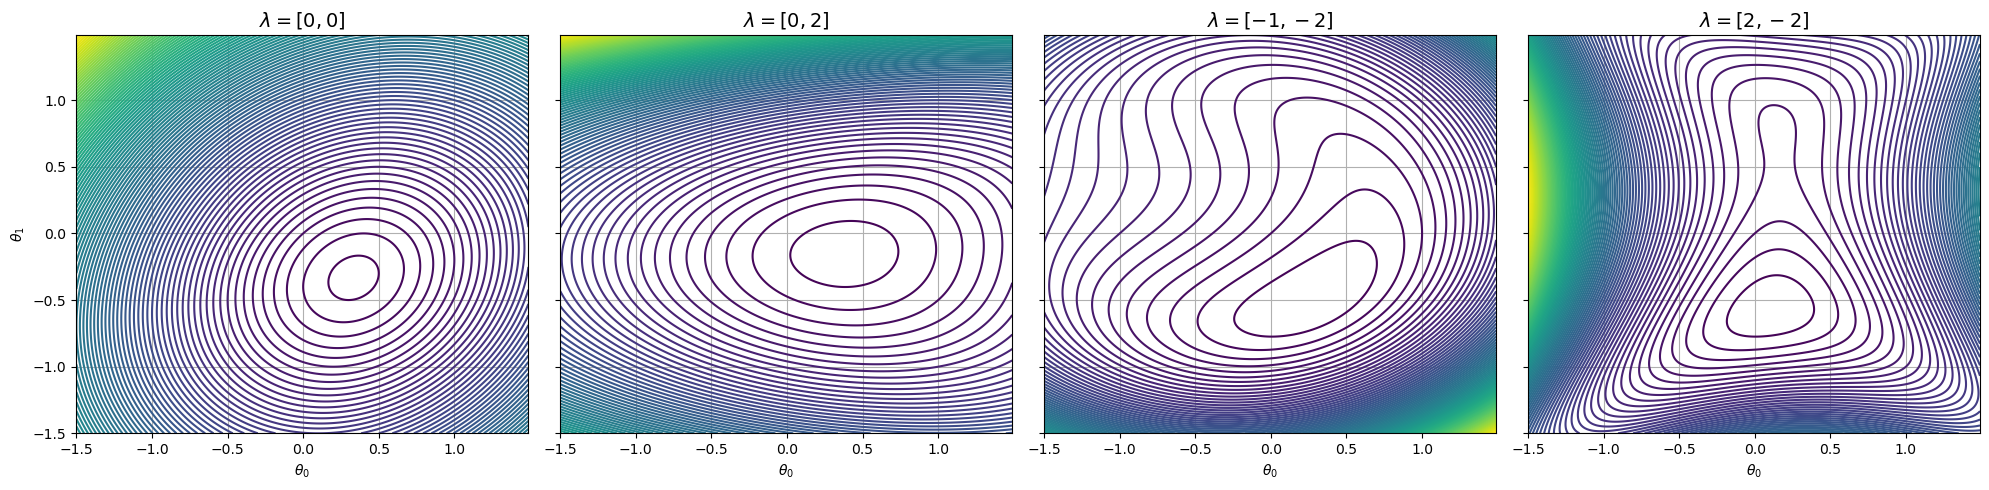

In [7]:

# Plot
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Changed to 1 row and 4 columns
Lm = np.array([[0, 0], [0, 2], [-1, -2], [2, -2]])

for i in range(Lm.shape[0]):
    R = risk(mu, Lm[i,:], beta0, beta1)
    axs[i].contour(beta0, beta1, R, 100)
    axs[i].set_title(r'$\lambda = [{} , {}]$'.format(Lm[i, 0], Lm[i, 1]), fontsize=14)
    axs[i].grid()

    # Superpose to each figure the corresponding trajectory of retraining
    m = 10
    beta_retraining = np.zeros((m, 2))
    for j in range(m):
        if j == 0:
            v = mu  # Initial estimate with no prior deployment
        else:
            v = mu + np.multiply(beta_retraining[j-1,:], Lm[i,:])  # Performative effect with previously estimated value
        beta_retraining[j,:] = -v/(2 + 0.5*np.sum(np.square(v)))
    #axs[i].scatter(beta_retraining[:,0], beta_retraining[:,1], color='red', marker='o')

for ax in axs.flat:
    ax.set(xlabel='$\\theta_0$', ylabel='$\\theta_1$')  # LaTeX formatting added

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.savefig('linear-regression-flat.pdf')

plt.show()

# Version With Normalized Drift Effect (Strange Idea, Disregard for the Time Being)

In this version we let
$$
    \mu(\theta) = \mu + \frac{2\rho}{\|\beta\|^2} \lambda \odot \beta
$$
so that $\lambda = 1$ would correspond to the complete step between the two means. *[Unless there's an error somewhere it doesn't really have the expected effect]*

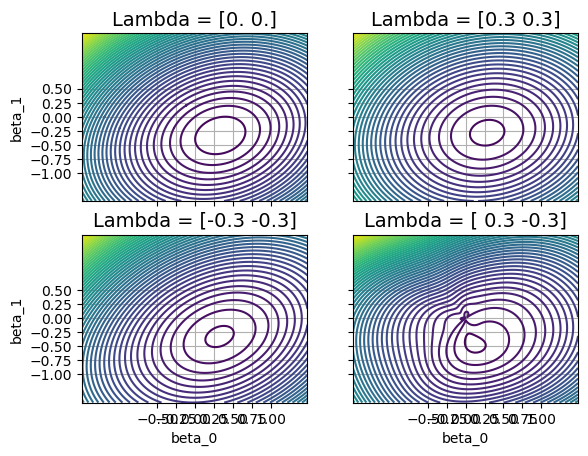

In [6]:
# Risk computation for normalized effect (**dirty**)
def risk2(mu, lm, beta0, beta1):
  mu_dot_beta = mu[0]*beta0 + mu[1]*beta1
  v = np.divide(lm[0]*np.square(beta0)+lm[1]*np.square(beta1), np.square(beta0)+np.square(beta1))
  rho = -np.divide(2*mu_dot_beta + 4*v +4*np.multiply(mu_dot_beta,v), 4 + 8*v + 8*np.square(v))
  mu_theta_dot_beta = mu_dot_beta + 2*np.multiply(rho, v)
  R = 0.5*(2 + 2*np.square(rho) + 2*(np.square(beta0)+np.square(beta1)) + 2*np.multiply(1+rho, mu_theta_dot_beta) \
    + np.square(mu_theta_dot_beta))
  return R

# Plot
fig, axs = plt.subplots(2,2)
Lm = np.array([[0, 0], [0.3, 0.3], [-0.3, -0.3], [0.3, -0.3]])

for i in range(Lm.shape[0]):
  R = risk2(mu, Lm[i,:], beta0, beta1)
  axs[i//2,i%2].contour(beta0, beta1, R, 50) #axs[0,0].plot_surface(beta0, beta1, R)
  axs[i//2,i%2].set_title('Lambda = ' + str(Lm[i,:]), fontsize=14)
  axs[i//2,i%2].set_xticks([-0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
  axs[i//2,i%2].set_yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5])
  axs[i//2,i%2].grid()

for ax in axs.flat:
  ax.set(xlabel='beta_0', ylabel='beta_1')
for ax in axs.flat:
  ax.label_outer()  
plt.show()